In [207]:
import numpy as np
import pickle
import stages
import matplotlib.pyplot as plt

In [208]:
import stages_config as config

states_infty_list = []
for sim in config.sim_list:
    f = open(f"data/lambda={sim.lmbd}-Nt={sim.Nt}T={sim.T}-dt={sim.dt}-omega0={sim.omega0}.pkl", "rb")
    data = pickle.load(f)
    states_infty_list.append(data[1])
    f.close()

/home/seve/Uni/Msc-unitn/Thesis/Zeno/quantum-zeni/stages.py:21: RuntimeWarning: invalid value encountered in power
  N = lmbd * np.power(n/d, lmbd/gamma)


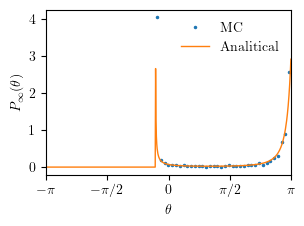

In [211]:
for sim, states_infty in zip(config.sim_list, states_infty_list):
    thetas = []
    for state in states_infty:
        thetas.append(stages.state_to_theta(state))

    plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

    counts, bins = np.histogram(thetas, 36)
    bin_width = bins[1] - bins[0]
    freqs = counts / sim.Nt / bin_width

    plt.plot(bins[:-1] + bin_width/2, freqs, ".", label=r"MC")
    plt.plot(np.arange(-np.pi, np.pi, .01), stages.p_infty(sim.lmbd, np.arange(-np.pi, np.pi, .01)), label=r"Analitical")

    plt.xlim((-np.pi, np.pi))
    xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    xlabels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
    plt.xticks(xticks, xlabels)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$P_\infty(\theta)$")
    plt.legend()

    plt.tight_layout()

    plt.savefig(f"plots/lambda={sim.lmbd}-Nt={sim.Nt}T={sim.T}-dt={sim.dt}-omega0={sim.omega0}.pdf")